In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Generate artificial dataset with three class centers using make_blobs
centers = [[-3, 2], [7, -4], [5, 8]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, centers=np.array(centers), random_state=1)


In [7]:
  # Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)



In [8]:
# Create and fit a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [9]:
# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")


Accuracy Score: 1.00


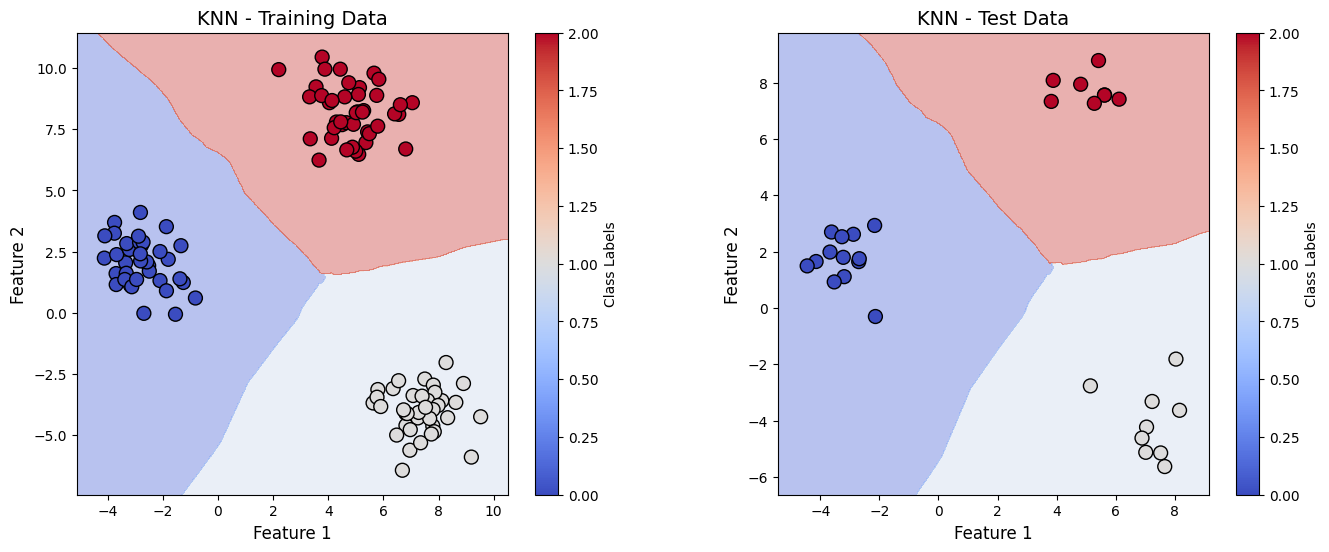

In [16]:
# Function to plot decision boundaries with enhanced visualization
def plot_decision_boundaries(X, y, model, title, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

 # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', marker='o', s=100)

    # Colorbar to show class labels
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Class Labels')

    # Add labels and title
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)

# Set up the figure with better aesthetics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.3)

# Plot decision boundaries for training data
plot_decision_boundaries(X_train, y_train, knn, 'KNN - Training Data', axes[0])

# Plot decision boundaries for test data
plot_decision_boundaries(X_test, y_test, knn, 'KNN - Test Data', axes[1])

# Display the plot
plt.show()